# Housing Price Prediction

## Data Source Reference

In [5]:
# https://www.kaggle.com/datasets/camnugent/california-housing-prices?datasetId=5227&sortBy=voteCount

## What is Linear Regression

In [6]:
# Linear regression is a way to study the connection between a main variable (dependent variable) and one or more other variables (independent variables)(James et al., 2013). In the simplest case it's like drawing a straight line through the data points which is called univariate linear regression. If there are multiple independent variables we call it multivariate linear regression. (Montgomery et al., 2012).

# The main goal of linear regression is to find the line that fits the data best by minimizing the total of the squared differences between the actual values and the predicted values. This method is called the method of least squares.

# Linear regression is used in many areas like economics, social sciences and engineering because it's simple while being easy to understand and not too hard to do. Even though it has some limitations like being sensitive to extreme values and assuming a straight-line relationship linear regression is still a popular way to understand how variables are related and make predictions.  (Montgomery et al., 2012).



## Why the data set is appropriate for linear regression

In [7]:
# The dataset has a mix of continuous and categorical variables that can help predict the main goal which is the median house value. Continuous variables, like longitude, latitude and median income can be used directly in a linear regression model (James et al., 2013). Categorical variables like how close a house is to the ocean, can be converted into numbers using methods like one-hot encoding. Linear regression works best when there's a direct relationship between the variables and the main goal. In the housing dataset it makes sense that variables like median income, housing age and location are related to the median house value in a direct manner.

## An explanation of what analysis is going to be performed

### What is the question that the analysis will answer?

In [8]:
# Can we predict the median house value based on the given features in the dataset?

###  How I plan to verify your results

In [9]:
# Data splitting: The dataset will be split into training and testing sets using the train_test_split function from the sklearn.model_selection module (Pedregosa et al., 2011). This helps assess the model's performance on unseen data ensuring a fair evaluation of its generalization capabilities.

### The necessary features to be extracted from the dataset include:

In [10]:
# 1. Continuous features: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, and median_income.
# 2. Categorical feature: ocean_proximity.

### Before fitting the data to the model, the following considerations will be made to address overfitting and underfitting:

In [11]:
# Data cleaning: Impute missing values in the continuous features using the median strategy with the SimpleImputer class from sklearn.impute module (Pedregosa et al., 2011). This ensures that the model is not affected by missing data which could lead to underfitting.

# Feature transformation: Convert the categorical variable (ocean_proximity) to numerical values using one-hot encoding with the OneHotEncoder class from sklearn.preprocessing module (Pedregosa et al., 2011). This transformation allows the linear regression model to utilize the categorical information effectively.

### The libraries to be imported and used for this analysis include:

In [12]:
# pandas: for data manipulation and analysis.
# numpy: for numerical computations.
# matplotlib.pyplot: for data visualization.
# seaborn: for advanced data visualization.
# sklearn: for machine learning tasks which include data preprocessing, model fitting and performance evaluation.

### Which predication will I make

In [13]:
# The analysis will involve making predictions on the median house value using the linear regression model trained on the dataset's features

### How I will visualize the data.

In [14]:
# Data visualization will be performed using matplotlib.pyplot and seaborn libraries. The initial step will be to create a scatter plot of the dataset's longitude and latitude to understand the geographical distribution of the data.

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seab
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load and Visualize Data

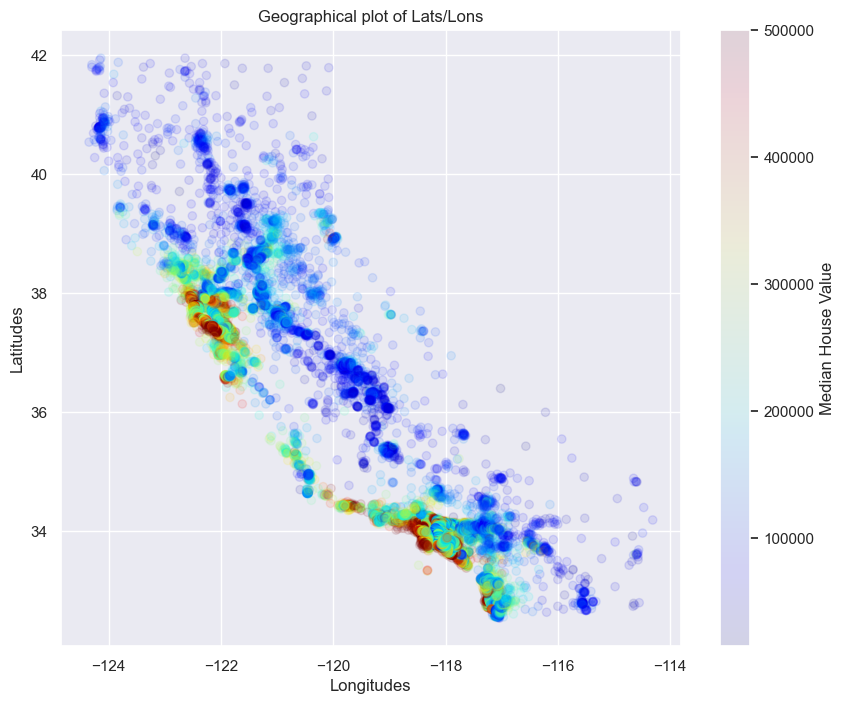

In [16]:
# Read in the dataset
housing = pd.read_csv('housing.csv')

# Visualize geographical data
seab.set()
plt.figure(figsize=(10, 8))
plt.scatter('longitude', 'latitude', data=housing, alpha=0.1, c=housing['median_house_value'], cmap='jet')
plt.colorbar(label='Median House Value')
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

## Visualize Correlation between Features

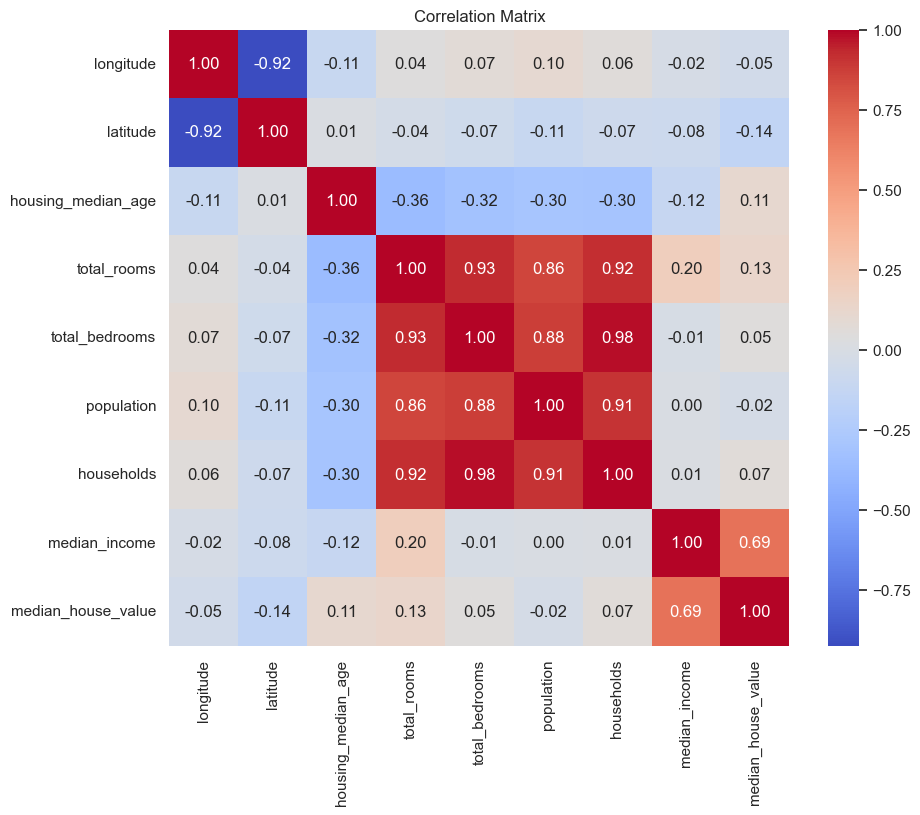

In [17]:
# Visualize correlation between features
corr_matrix = housing.drop('ocean_proximity', axis=1).corr()
plt.figure(figsize=(10, 8))
seab.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [18]:
# Data Cleaning
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# Convert categorical data to numerical data
encoder = OneHotEncoder()
ocean_proximity_cat = housing[['ocean_proximity']]
ocean_proximity_1hot = encoder.fit_transform(ocean_proximity_cat)

# Concatenate the numerical data with the rest of the dataset
housing_cat_1hot = ocean_proximity_1hot.toarray()
housing_prepared = np.concatenate((housing_tr, housing_cat_1hot), axis=1)

## Train and Test Model

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing.median_house_value, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model Performance

In [20]:
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Root Mean Squared Error: 2.319340344848328e-10
Mean Absolute Error: 1.779115287478302e-10
R-squared: 1.0


## Visualize Residuals

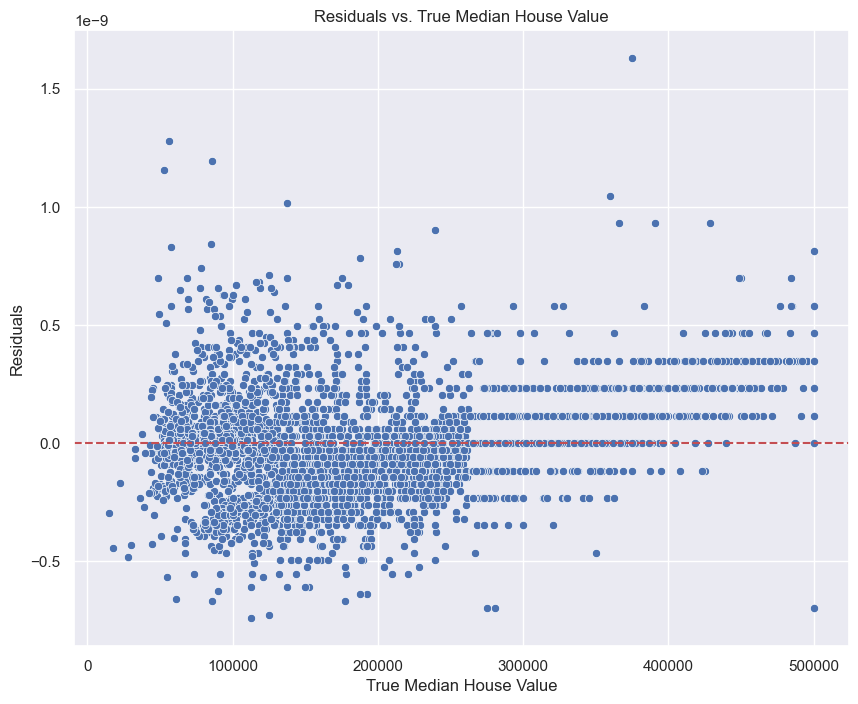

In [21]:
plt.figure(figsize=(10, 8))
seab.scatterplot(x=y_test, y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Median House Value')
plt.ylabel('Residuals')
plt.title('Residuals vs. True Median House Value')
plt.show()

## References List

In [22]:
# James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. Springer.

# Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

# Wooldridge, J. M. (2012). Introductory Econometrics: A Modern Approach (5th ed.). South-Western Cengage Learning.

# www.kaggle.com. (n.d.). California Housing Prices. [online] Available at: https://www.kaggle.com/datasets/camnugent/california-housing-prices?datasetId=5227&sortBy=voteCount [Accessed 27 Apr. 2023].

# www.youtube.com. (n.d.). Jupyter Notebook Overview || Data Science || Coders Arcade. [online] Available at: https://www.youtube.com/watch?v=DnpsRKz_0ik [Accessed 27 Apr. 2023].

# Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to Linear Regression Analysis. Wiley.